In [228]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import math
import matplotlib.pyplot as plt

In [229]:
df = pd.read_csv('./compiled.csv')
# df = df.dropna()
#df = df.drop(columns=['Unnamed: 0']).dropna()
df.columns

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', '3P%', '2P%', 'FT%', 'TmNetRtg'],
      dtype='object')

### Calculate Change in TmNetRtg and WS

In [230]:
next_rtg = []
for index, row in df.iterrows():
    current_team = row['Tm']
    next_year = row['Year'] + 1
    
    try:
        rtg = df.loc[(df['Tm'] == current_team) & (df['Year'] == next_year)].iloc[0]['TmNetRtg']
        next_rtg.append(rtg)
    except:
        next_rtg.append(math.nan)

In [231]:
df['Next Rtg'] = next_rtg
df = df.dropna()
df.head()

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,DWS,WS,WS/48,OBPM,DBPM,3P%,2P%,FT%,TmNetRtg,Next Rtg
0,1997,Greg Anderson,C,32.0,SAS,82.0,1659.0,11.4,0.531,0.004,...,1.5,2.2,0.064,-3.1,1.4,0.000,0.498,0.667,-8.8,4.4
1,1997,Vinny Del,SG,30.0,SAS,72.0,2243.0,14.4,0.529,0.179,...,-0.1,3.1,0.066,0.6,-2.3,0.314,0.501,0.868,-8.8,4.4
2,1997,Carl Herrera,PF,30.0,SAS,75.0,1837.0,10.6,0.463,0.010,...,0.9,0.1,0.002,-4.0,-0.5,0.333,0.434,0.686,-8.8,4.4
3,1997,Avery Johnson,PG,31.0,SAS,76.0,2472.0,15.0,0.517,0.038,...,0.0,3.4,0.066,-0.2,-3.0,0.231,0.487,0.690,-8.8,4.4
4,1997,Vernon Maxwell,SG,31.0,SAS,72.0,2068.0,11.8,0.471,0.411,...,0.3,0.0,-0.001,-0.6,-2.7,0.309,0.421,0.744,-8.8,4.4


In [232]:
change_rtg = 100*((df['Next Rtg'] - df['TmNetRtg']).divide(df['TmNetRtg'].abs()))
#assert(change_rtg[0] == df.iloc[0]['Next Rtg'] - df.iloc[0]['TmNetRtg'])

In [233]:
change_rtg.replace([np.inf, -np.inf], np.nan, inplace=True)
change_rtg.dropna(inplace=True)
change_rtg.describe()

count    1216.000000
mean      -46.569993
std       627.405814
min     -7800.000000
25%       -95.454545
50%       -20.754717
75%        59.375000
max      2400.000000
dtype: float64

In [234]:
next_ws = []
for index, row in df.iterrows():
    current_player = row['Player']
    next_year = row['Year'] + 1
    
    try:
        ws = df.loc[(df['Player'] == current_player) & (df['Year'] == next_year)].iloc[0]['WS']
        next_ws.append(ws)
    except:
        next_ws.append(math.nan)

In [235]:
df['Next WS'] = next_ws
df = df.dropna()
df.tail()

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,WS,WS/48,OBPM,DBPM,3P%,2P%,FT%,TmNetRtg,Next Rtg,Next WS
1367,2019,JaVale McGee,C,31.0,LAL,75.0,1671.0,21.8,0.634,0.019,...,5.9,0.171,0.3,1.2,0.083,0.634,0.632,-1.6,5.6,4.7
1372,2019,Paul Millsap,PF,33.0,DEN,70.0,1895.0,17.9,0.570,0.239,...,6.1,0.155,0.7,1.0,0.365,0.522,0.727,4.0,2.2,3.5
1373,2019,J.J. Redick,SG,34.0,PHI,76.0,2379.0,15.1,0.602,0.589,...,5.9,0.118,2.2,-2.0,0.397,0.502,0.894,2.6,2.3,4.1
1374,2019,Ish Smith,PG,30.0,DET,56.0,1251.0,11.8,0.485,0.276,...,1.7,0.064,-1.6,-0.3,0.326,0.455,0.758,-0.3,-3.5,1.9
1376,2019,Russell Westbrook,PG,30.0,OKC,73.0,2630.0,21.1,0.501,0.279,...,6.8,0.124,2.8,2.4,0.290,0.481,0.656,3.4,2.1,4.2


### Create Veteran Value Metric

In [236]:
change_ws = 100*((df['Next WS'] - df['WS'])/abs(df['WS']))
#assert(change_ws[0] == (df.iloc[0]['Next WS'] - df.iloc[0]['WS']))
#assert(len(change_ws) == len(change_usg))

In [237]:
change_ws.describe()

count     697.000000
mean        2.943153
std       122.517245
min      -300.000000
25%       -40.350877
50%       -16.071429
75%        18.421053
max      2200.000000
dtype: float64

In [238]:
z = zip(change_ws, change_rtg)
targets = []
target_class = []
#tgt represents decline
for t in z:
    d_ws = t[0]
    d_rtg = t[1]
    
    RTG_UP = d_rtg > 0
    RTG_DOWN = d_rtg < 0
    WS_UP = d_ws >= 0
    
    
    if RTG_UP:
        vv = d_rtg * d_ws
    else:
        if WS_UP:
            vv = -1*d_rtg 
        else:
            vv = d_rtg / d_ws
        
        
    
    targets.append(vv)
    target_class.append(0 if vv >= 0 else 1)
    
df['Veteran Value'] = targets
df['VV Class'] = target_class

In [239]:
np.mean(targets)

18.523419381414442

In [240]:
np.percentile(targets, 10)

-4435.644482929242

In [241]:
df.head()

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OBPM,DBPM,3P%,2P%,FT%,TmNetRtg,Next Rtg,Next WS,Veteran Value,VV Class
1,1997,Vinny Del,SG,30.0,SAS,72.0,2243.0,14.4,0.529,0.179,...,0.6,-2.3,0.314,0.501,0.868,-8.8,4.4,3.7,2903.225806,0
3,1997,Avery Johnson,PG,31.0,SAS,76.0,2472.0,15.0,0.517,0.038,...,-0.2,-3.0,0.231,0.487,0.690,-8.8,4.4,6.7,14558.823529,0
7,1997,Charles Barkley,PF,33.0,HOU,53.0,2009.0,23.0,0.581,0.296,...,4.4,2.8,0.283,0.569,0.694,4.7,-0.9,8.6,-1276.595745,1
8,1997,Clyde Drexler,SG,34.0,HOU,62.0,2271.0,19.9,0.548,0.373,...,3.9,1.7,0.355,0.493,0.750,4.7,-0.9,6.8,-2407.407407,1
9,1997,Mario Elie,SF,33.0,HOU,78.0,2687.0,14.3,0.662,0.489,...,2.4,0.1,0.420,0.572,0.896,4.7,-0.9,3.8,-8595.505618,1


### Relationship between Decline and Features¶

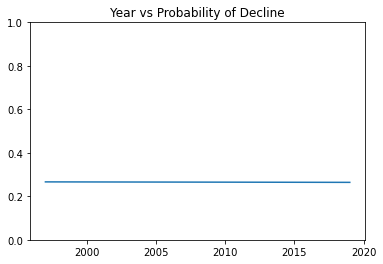

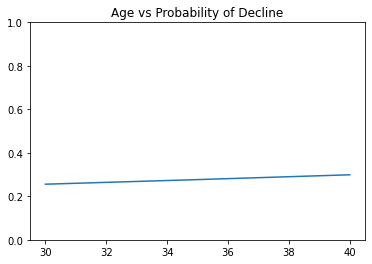

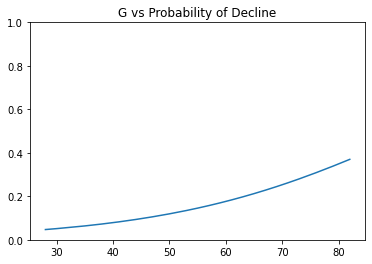

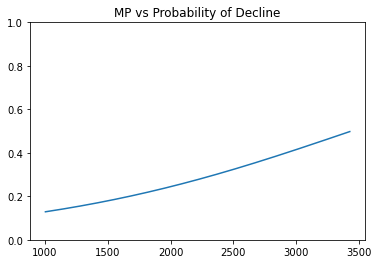

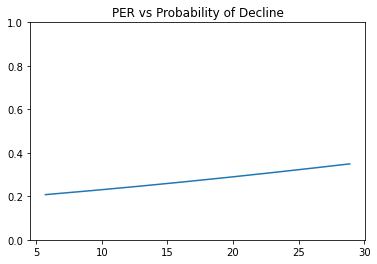

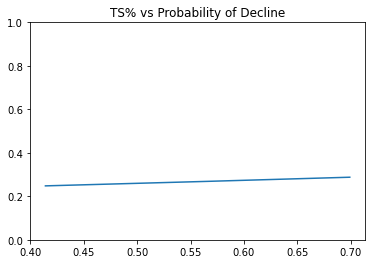

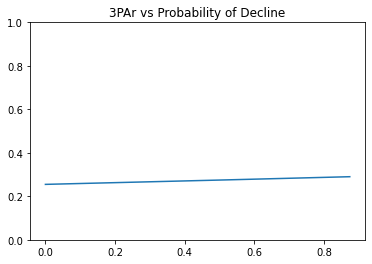

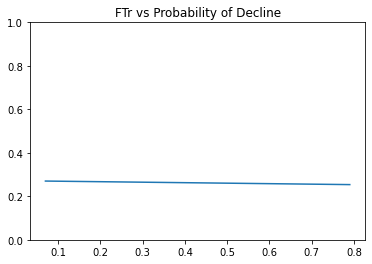

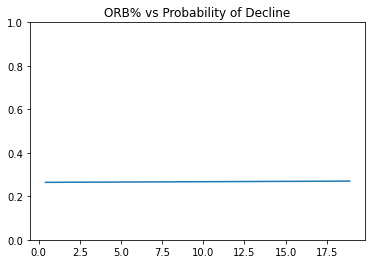

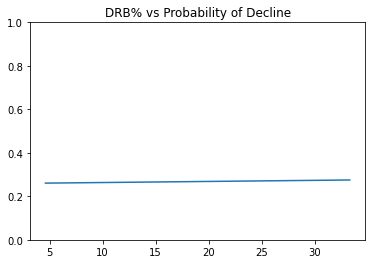

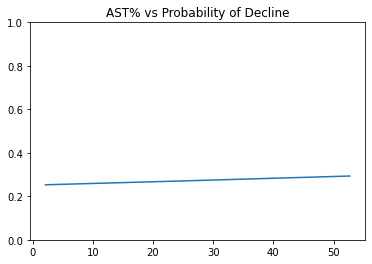

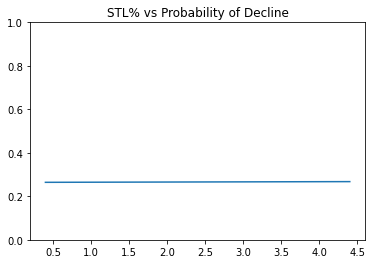

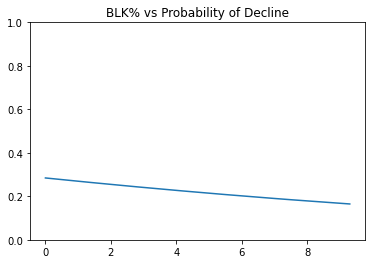

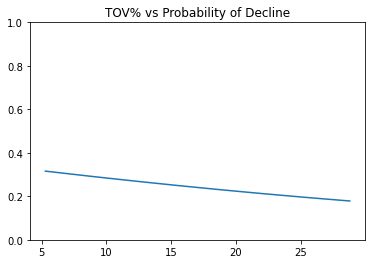

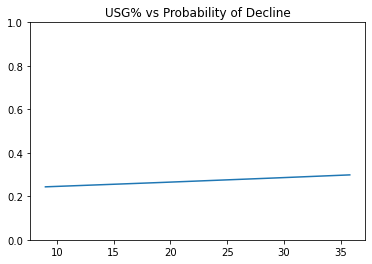

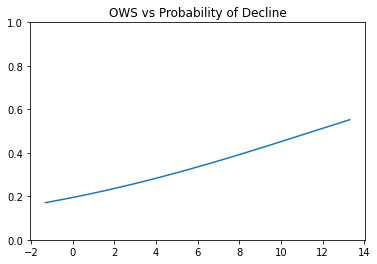

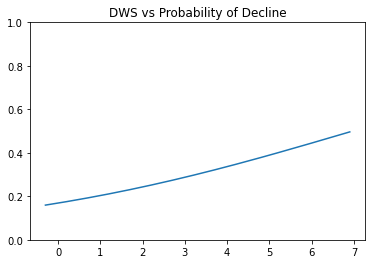

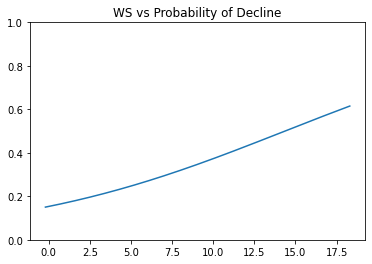

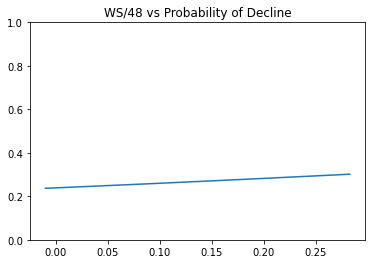

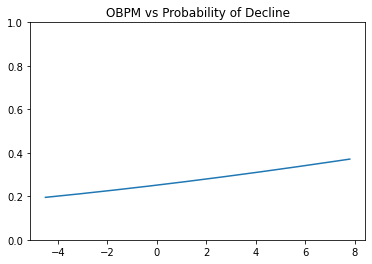

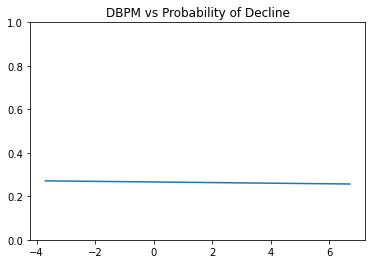

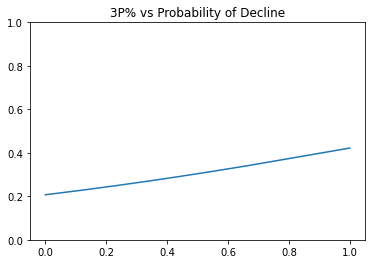

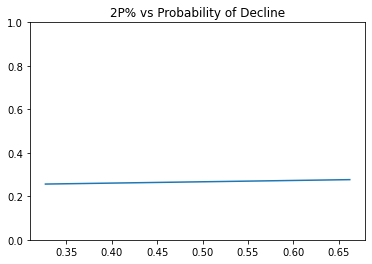

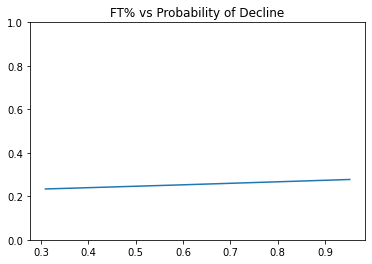

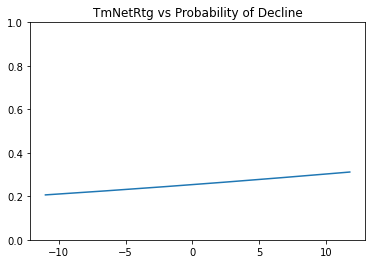

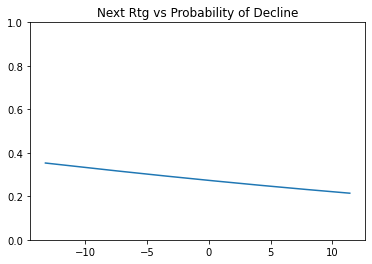

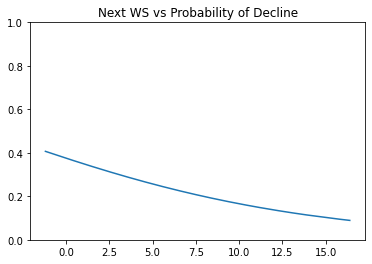

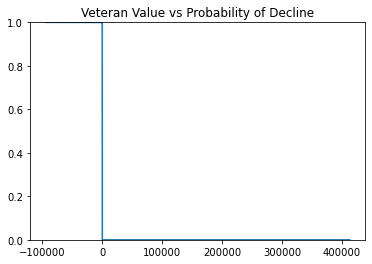

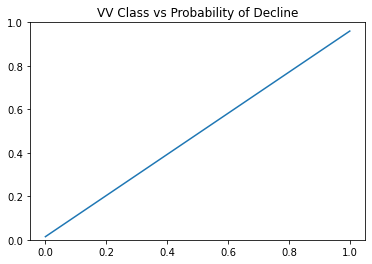

In [242]:
label = df['VV Class']
for c in df.columns:
    try:
        feature = list(df[c])

        z = list(zip(feature, label))
        z = sorted(z, key=lambda t: t[0])

        X = [t[0] for t in z]
        X = np.array(X).reshape(-1, 1)
        y = [t[1] for t in z]

        clf = LogisticRegression(random_state=0).fit(X, y)
        yg = clf.predict_proba(X)[:, 1]

        plt.title('%s vs Probability of Decline'%(c))
        plt.plot(X, yg)
        ax = plt.gca()
        ax.set_ylim([0, 1])
        plt.show()
    except:
        continue

### Visualizing Distribution of Veteran Value

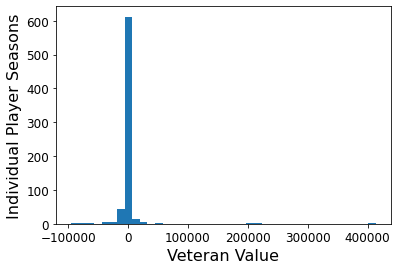

In [243]:
ax = plt.hist(df['Veteran Value'], bins=40)
ax = plt.xlabel('Veteran Value', fontsize=16)
ax = plt.ylabel('Individual Player Seasons', fontsize=16)
ax = plt.xticks(fontsize=12)
ax = plt.yticks(fontsize=12)

In [244]:
def outlier_aware_hist(data, lower=None, upper=None):
    if not lower or lower < data.min():
        lower = data.min()
        lower_outliers = False
    else:
        lower_outliers = True

    if not upper or upper > data.max():
        upper = data.max()
        upper_outliers = False
    else:
        upper_outliers = True

    n, bins, patches = plt.hist(data, range=(lower, upper), bins='auto')

    if lower_outliers:
        n_lower_outliers = (data < lower).sum()
        patches[0].set_height(patches[0].get_height() + n_lower_outliers)
        patches[0].set_facecolor('c')
        patches[0].set_label('Lower outliers: ({:.2f}, {:.2f})'.format(data.min(), lower))

    if upper_outliers:
        n_upper_outliers = (data > upper).sum()
        patches[-1].set_height(patches[-1].get_height() + n_upper_outliers)
        patches[-1].set_facecolor('m')
        patches[-1].set_label('Upper outliers: ({:.2f}, {:.2f})'.format(upper, data.max()))

    if lower_outliers or upper_outliers:
        plt.legend()
    plt.title('Range of Veteran Value')
    plt.xlabel('Veteran Value',fontsize=12)
    plt.ylabel('Frequency',fontsize=12)

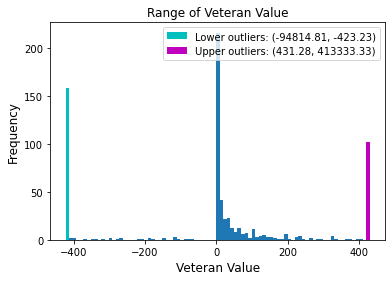

In [245]:
def mad(data):
    median = np.median(data)
    diff = np.abs(data - median)
    mad = np.median(diff)
    return mad

def calculate_bounds(data, z_thresh=3.5):
    MAD = mad(data)
    median = np.median(data)
    const = z_thresh * MAD / 0.6745
    return (median - const, median + const)

outlier_aware_hist(df['Veteran Value'], *calculate_bounds(df['Veteran Value']))

The distribution of player decline appears normal, with most of the change centered around 0, which makes sense based on how we calculate decline. However the outliers extend pretty far out to ranges from -6 to -30 and improvement having a range from 6 to 22. While the objective is to find the largest veteran declines, we also want to make sure our formula has a proper distribution, there appears to be too many players in the lower and upper outlier range as indicated by the first and last bin. 

### Evaluate How Age and Playing Time Affects Veteran Value

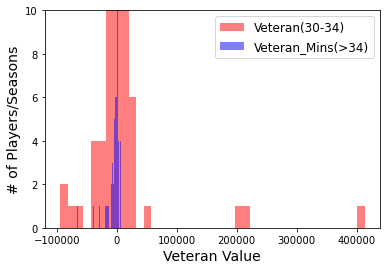

In [246]:
# Separate players into Veteran(30-34) and Veteran_Mins(>=35). 
#Veteran_Mins are old players who typically sign for the minimum
veteran = df.loc[(df['Age']>=30) & (df['Age']<35), 'Veteran Value']
veteran_mins = df.loc[df['Age']>=35, 'Veteran Value']
plot_data = [veteran, veteran_mins]
labels = ['Veteran(30-34)','Veteran_Mins(>34)']
colors = ['red','blue']
# Histogram
#ax = plt.figure(figsize=(8,6))
ax = plt.gca()
ax.set_ylim([0,10])
for group, label, color in zip(plot_data, labels, colors):
    _ = plt.hist(group, bins=40, alpha=0.5, label=label, color=color)
plt.xlabel('Veteran Value', fontsize=14)
plt.ylabel('# of Players/Seasons', fontsize=14)
plt.legend(fontsize=12)

In [247]:
df.loc[(df['Veteran Value'] >2000)]

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OBPM,DBPM,3P%,2P%,FT%,TmNetRtg,Next Rtg,Next WS,Veteran Value,VV Class
1,1997,Vinny Del,SG,30.0,SAS,72.0,2243.0,14.4,0.529,0.179,...,0.6,-2.3,0.314,0.501,0.868,-8.8,4.4,3.7,2903.225806,0
3,1997,Avery Johnson,PG,31.0,SAS,76.0,2472.0,15.0,0.517,0.038,...,-0.2,-3.0,0.231,0.487,0.690,-8.8,4.4,6.7,14558.823529,0
40,1997,Rik Smits,C,30.0,IND,52.0,1518.0,18.3,0.535,0.011,...,-1.2,0.2,0.250,0.488,0.797,1.3,6.8,6.1,2468.319559,0
52,1997,Dan Majerle,SF,31.0,MIA,36.0,1264.0,13.2,0.523,0.579,...,1.3,2.1,0.338,0.500,0.678,6.0,5.2,5.3,21758.241758,0
53,1997,Ron Harper,PG,33.0,CHI,76.0,1740.0,13.6,0.543,0.463,...,1.0,1.7,0.362,0.500,0.707,11.8,7.8,7.2,11133.603239,0
86,1998,Hakeem Olajuwon,C,35.0,HOU,47.0,1633.0,20.8,0.531,0.005,...,0.1,3.6,0.000,0.486,0.755,-0.9,2.5,6.5,5833.333333,0
117,1998,Danny Ferry,PF,31.0,CLE,69.0,1034.0,7.5,0.479,0.346,...,-3.2,0.2,0.333,0.428,0.800,2.8,-1.9,1.7,26444.444444,0
138,1998,Olden Polynice,C,33.0,SAC,70.0,1458.0,14.7,0.464,0.002,...,-2.1,0.5,0.000,0.460,0.452,-5.9,-0.4,2.0,2326.388889,0
163,1999,Patrick Ewing,C,36.0,NYK,38.0,1300.0,19.4,0.491,0.004,...,-3.3,2.8,0.000,0.436,0.706,1.2,1.5,4.8,4855.371901,0
171,1999,Mark Jackson,PG,33.0,IND,49.0,1382.0,17.9,0.513,0.313,...,2.8,-1.3,0.311,0.469,0.823,4.3,5.1,6.7,11447.368421,0


In [248]:
def ztest(d1, d2, label):
    from statsmodels.stats.weightstats import CompareMeans
    test_data = CompareMeans.from_data(d1, d2)
    z, p = CompareMeans.ztest_ind(test_data)
    print('For {}, z = {}, p = {}'.format(label,z,p))

In [249]:
ztest(veteran, veteran_mins, 'Veterans vs Old Veterans')
print('The average improvement for veterans were', veteran.mean())
print('The average improvement for old veterans were', veteran_mins.mean())

For Veterans vs Old Veterans, z = 1.1019614130392092, p = 0.2704784474947346
The average improvement for veterans were 409.3625806027557
The average improvement for old veterans were -2001.3887058687023


There appears to be a much larger distribution of decline amongst veteran players compared to older veterans. This is expected, as most player are already past their prime by the age of 35. Furthermore, the ztest shows the affect of decline between veterans and old veterans is statistically insignificant.

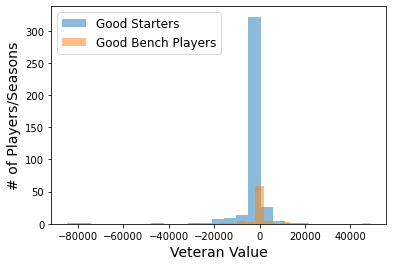

In [250]:
# Separate data into good starters and good bench
good_starters = df.loc[(df['WS/48']>=0.1) & (df['MP']/df['G']>25), 'Veteran Value']
good_bench = df.loc[(df['WS/48']>=0.1) & (df['MP']/df['G']<=25), 'Veteran Value']
ax = plt.hist(good_starters, bins=20, alpha=0.5, label='Good Starters')
ax = plt.hist(good_bench, bins=20, alpha=0.5, label='Good Bench Players')
plt.xlabel('Veteran Value', fontsize=14)
plt.ylabel('# of Players/Seasons', fontsize=14)
plt.legend(fontsize=12)

In [251]:

ztest(good_starters, good_bench, 'Good Starters vs Good Bench')
print('The average improvement for good starters were', good_starters.mean())
print('The average improvement for good bench players were', good_bench.mean())

For Good Starters vs Good Bench, z = -1.410653264670768, p = 0.1583468776933834
The average improvement for good starters were -1605.31059261237
The average improvement for good bench players were -236.4435699707683


The results for this are more interesting, there appears to be a significant impact on decline when a player is a starter vs a bench player. We can infer that there might need to be an additional target class identifier between what we define as bench players compared to starter players.

In [252]:
players = df.loc[(df['WS/48']>=0.1) & (df['MP']/df['G']>25),'Player']
starters = []
for p in df['Player']:
    if p in list(players):
        starters.append(1)
    else:
        starters.append(0)
df['Starters'] = starters

In [253]:
#Check VV on single player
df[['WS','Veteran Value']][df['Player']=='Shawn Marion']

,WS,Veteran Value
819,3.6,51.851852
857,5.0,60.759494
925,5.6,4.386781
963,3.7,1572.481572
1013,5.3,12.021951
1066,4.3,2.646154


In [254]:
df.to_csv('model_data.csv')